In [1]:
from multiprocessing import Pool
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [37]:
def arrangement_1(nleds,d):

    l=math.sqrt(nleds);

    ledcord=np.zeros((2,nleds));

    temp=0;
    for k in range(nleds):
        ledcord[0,k]=-(l-1)*d/2 +((k)%l)*d;
        if (k)%l ==0 and k != 0:
            temp=temp+1;
        ledcord[1,k]=-(l-1)*d/2 + temp*d;

    return ledcord

def E_xy_cent(ledcord,nleds,Ir_0,z,d):
    
    x=0;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;
    
def E_xy_end(ledcord,nleds,Ir_0,z,d,x_end):
    
    x=x_end;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;

def plot_E_xy_full(ledcord,nleds,Ir_0,z,d):
    l=math.sqrt(nleds)
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-10, 10, 0.01)

    x,y=np.meshgrid(x, y, sparse=False, indexing='ij')

    E=np.zeros(np.size(x));

    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));
        
    return E;



In [38]:
Ir_0 = 1;
final_list = []
def ratio(d):
    final_list = []
    for nleds in [9,25,49,81,121,169]:
        lled=np.sqrt(nleds)
        if((lled-1)*d>0.5):
            break
        else:     
            ledcord = arrangement_1(nleds,d)
            nz = (0.5 - d)/0.01 +1
            for z in np.linspace(d,0.5,nz):
                E_cent = E_xy_cent(ledcord,nleds,Ir_0,z,d)
                E_half = E_cent/2
                E_99 = E_cent * 0.99
                x_half = 0
                x_99 = 0
                x_half_flag = False
                x_99_flag = False

                for x_end in np.linspace(0,5,5001):
                    E_end=E_xy_end(ledcord,nleds,Ir_0,z,d,x_end)
                    if E_end < E_half and not x_half_flag:
                        x_half = x_end
                        x_half_flag = True
                    if E_end < E_99 and not x_99_flag:
                        x_99 = x_end
                        x_99_flag = True
                final_list.append([nleds,d,z,E_cent,E_99, x_99,E_half,x_half])
    return final_list
with Pool(7) as p:
      l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,20)), total=20))


  0%|          | 0/9 [00:17<?, ?it/s]Process ForkPoolWorker-21:
Process ForkPoolWorker-16:



KeyboardInterrupt: 

In [27]:
t=[]
for i in l:
    t.extend(i)
    print(len(i))
final_list=t


54
54
36
27
18
9
9
9
9


In [28]:
df = pd.DataFrame(final_list,columns=["nleds","d","z","E_cent","E_99","x_99","E_half","x_half"])
df = df.drop_duplicates()

In [29]:
df["ratio"]=df["x_99"]/df["x_half"]

In [30]:
len(df["E_half"].unique())

225

In [31]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
# df

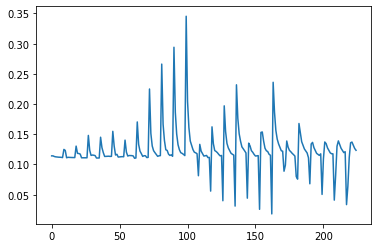

In [32]:
plt.plot(df["ratio"])

In [33]:
len(df["ratio"].unique())

189

In [34]:
# ratio_max=max(df["ratio"])
# df
df.shape

(225, 9)

In [35]:
idx = df.groupby(['nleds'])['ratio'].transform(max) == df['ratio']
df[idx][df[idx]["nleds"] != 1].sort_values("nleds")
# df[idx][df[idx]["nleds"] != 1].groupby("nleds").mean()

,nleds,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
54,9,0.03375,0.05000,1593.139658,1577.208262,0.008,796.569829,0.057,0.140351
63,25,0.03375,0.05000,2165.919260,2144.260068,0.015,1082.959630,0.088,0.170455
163,49,0.08125,0.10625,430.123205,425.821973,0.068,215.061602,0.288,0.236111
81,81,0.03375,0.05000,2540.581920,2515.176100,0.041,1270.290960,0.154,0.266234
90,121,0.03375,0.05000,2609.092185,2583.001263,0.055,1304.546092,0.187,0.294118
99,169,0.03375,0.05000,2650.496398,2623.991434,0.076,1325.248199,0.220,0.345455


In [36]:
ef=df[df["ratio"] == df["ratio"].max()]
max(ef["E_cent"])

2650.4963981978904

In [40]:
np.linspace(0.01,0.2,20)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])